In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///C:/Users/21.%20Technology/Downloads/Arrests.csv")
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [3]:
df.tail()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
5221,5222,Yes,White,2000,17,Male,Yes,Yes,0
5222,5223,Yes,White,2000,21,Female,Yes,Yes,0
5223,5224,Yes,Black,1999,21,Female,Yes,Yes,1
5224,5225,No,Black,1998,24,Male,Yes,Yes,4
5225,5226,Yes,White,1999,16,Male,Yes,Yes,3


In [4]:
df.sample(5)

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
714,715,No,White,2001,22,Male,Yes,Yes,4
4403,4404,Yes,White,1999,30,Male,Yes,Yes,2
1033,1034,Yes,White,2000,40,Male,Yes,Yes,3
1943,1944,Yes,White,1998,20,Male,Yes,Yes,5
1199,1200,Yes,White,2000,18,Male,Yes,Yes,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5226 non-null   int64 
 1   released    5226 non-null   object
 2   colour      5226 non-null   object
 3   year        5226 non-null   int64 
 4   age         5226 non-null   int64 
 5   sex         5226 non-null   object
 6   employed    5226 non-null   object
 7   citizen     5226 non-null   object
 8   checks      5226 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 367.6+ KB


In [7]:
df.dtypes

Unnamed: 0     int64
released      object
colour        object
year           int64
age            int64
sex           object
employed      object
citizen       object
checks         int64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0    0
released      0
colour        0
year          0
age           0
sex           0
employed      0
citizen       0
checks        0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,year,age,checks
count,5226.000000,5226.000000,5226.000000,5226.000000
mean,2613.500000,1999.509376,23.846537,1.636433
std,1508.760584,1.390056,8.316133,1.539230
min,1.000000,1997.000000,12.000000,0.000000
25%,1307.250000,1998.000000,18.000000,0.000000
50%,2613.500000,2000.000000,21.000000,1.000000
75%,3919.750000,2001.000000,27.000000,3.000000
max,5226.000000,2002.000000,66.000000,6.000000


In [10]:
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [12]:
df=df.drop(['Unnamed: 0'],axis=True)

In [13]:
df.head(3)

,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3
2,Yes,White,2000,24,Male,Yes,Yes,3


In [14]:
df.shape

(5226, 8)

In [18]:
df['released'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['colour'].unique()

array(['White', 'Black'], dtype=object)

In [21]:
df['year'].unique()

array([2002, 1999, 2000, 1998, 2001, 1997], dtype=int64)

In [22]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
df['employed'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df['citizen'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df.columns

Index(['released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen',
       'checks'],
      dtype='object')

In [29]:
df_col=['released', 'colour', 'sex', 'employed', 'citizen']

for i in df_col:
    df[i]=le.fit_transform(df[i])

In [30]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,1,1,1,3
1,0,0,1999,17,1,1,1,3
2,1,1,2000,24,1,1,1,3
3,0,0,2000,46,1,1,1,1
4,1,0,1999,27,0,1,1,1


In [31]:
df.dtypes

released    int32
colour      int32
year        int64
age         int64
sex         int32
employed    int32
citizen     int32
checks      int64
dtype: object

In [32]:
df.describe()

,released,colour,year,age,sex,employed,citizen,checks
count,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000
mean,0.829315,0.753540,1999.509376,23.846537,0.915232,0.786644,0.852468,1.636433
std,0.376270,0.430991,1.390056,8.316133,0.278563,0.409716,0.354669,1.539230
min,0.000000,0.000000,1997.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1998.000000,18.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2000.000000,21.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2001.000000,27.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,2002.000000,66.000000,1.000000,1.000000,1.000000,6.000000


In [33]:
df.corr()

,released,colour,year,age,sex,employed,citizen,checks
released,1.000000,0.133546,0.031968,-0.043052,-0.023032,0.197002,0.115307,-0.249592
colour,0.133546,1.000000,-0.004448,-0.067317,-0.059272,0.110765,0.221587,-0.172024
year,0.031968,-0.004448,1.000000,-0.004627,0.019599,0.030229,0.262320,-0.036870
age,-0.043052,-0.067317,-0.004627,1.000000,0.011485,-0.116673,-0.072696,0.135079
sex,-0.023032,-0.059272,0.019599,0.011485,1.000000,0.039379,-0.060743,0.107546
employed,0.197002,0.110765,0.030229,-0.116673,0.039379,1.000000,0.078368,-0.242897
citizen,0.115307,0.221587,0.262320,-0.072696,-0.060743,0.078368,1.000000,-0.034115
checks,-0.249592,-0.172024,-0.036870,0.135079,0.107546,-0.242897,-0.034115,1.000000


In [34]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
released,8.0,0.145268,0.371641,-0.249592,-0.028037,0.073638,0.149410,1.0
colour,8.0,0.145355,0.367975,-0.172024,-0.061283,0.053158,0.155556,1.0
year,8.0,0.162271,0.350892,-0.036870,-0.004493,0.024914,0.089556,1.0
age,8.0,0.105275,0.369366,-0.116673,-0.068662,-0.023840,0.042384,1.0
sex,8.0,0.129370,0.356064,-0.060743,-0.032092,0.015542,0.056421,1.0
employed,8.0,0.137022,0.374566,-0.242897,-0.006497,0.058874,0.132324,1.0
citizen,8.0,0.188754,0.351012,-0.072696,-0.040772,0.096838,0.231770,1.0
checks,8.0,0.063391,0.405511,-0.249592,-0.189742,-0.035492,0.114429,1.0


In [35]:
df.describe().corr().T

,released,colour,year,age,sex,employed,citizen,checks
released,1.000000,1.000000,0.871374,0.999955,1.000000,1.000000,1.000000,1.000000
colour,1.000000,1.000000,0.871368,0.999955,1.000000,1.000000,1.000000,1.000000
year,0.871374,0.871368,1.000000,0.873137,0.871384,0.871370,0.871376,0.871372
age,0.999955,0.999955,0.873137,1.000000,0.999955,0.999955,0.999955,0.999962
sex,1.000000,1.000000,0.871384,0.999955,1.000000,1.000000,1.000000,1.000000
employed,1.000000,1.000000,0.871370,0.999955,1.000000,1.000000,1.000000,1.000000
citizen,1.000000,1.000000,0.871376,0.999955,1.000000,1.000000,1.000000,1.000000
checks,1.000000,1.000000,0.871372,0.999962,1.000000,1.000000,1.000000,1.000000


In [37]:
df.columns

Index(['released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen',
       'checks'],
      dtype='object')

In [38]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,1,1,1,3
1,0,0,1999,17,1,1,1,3
2,1,1,2000,24,1,1,1,3
3,0,0,2000,46,1,1,1,1
4,1,0,1999,27,0,1,1,1


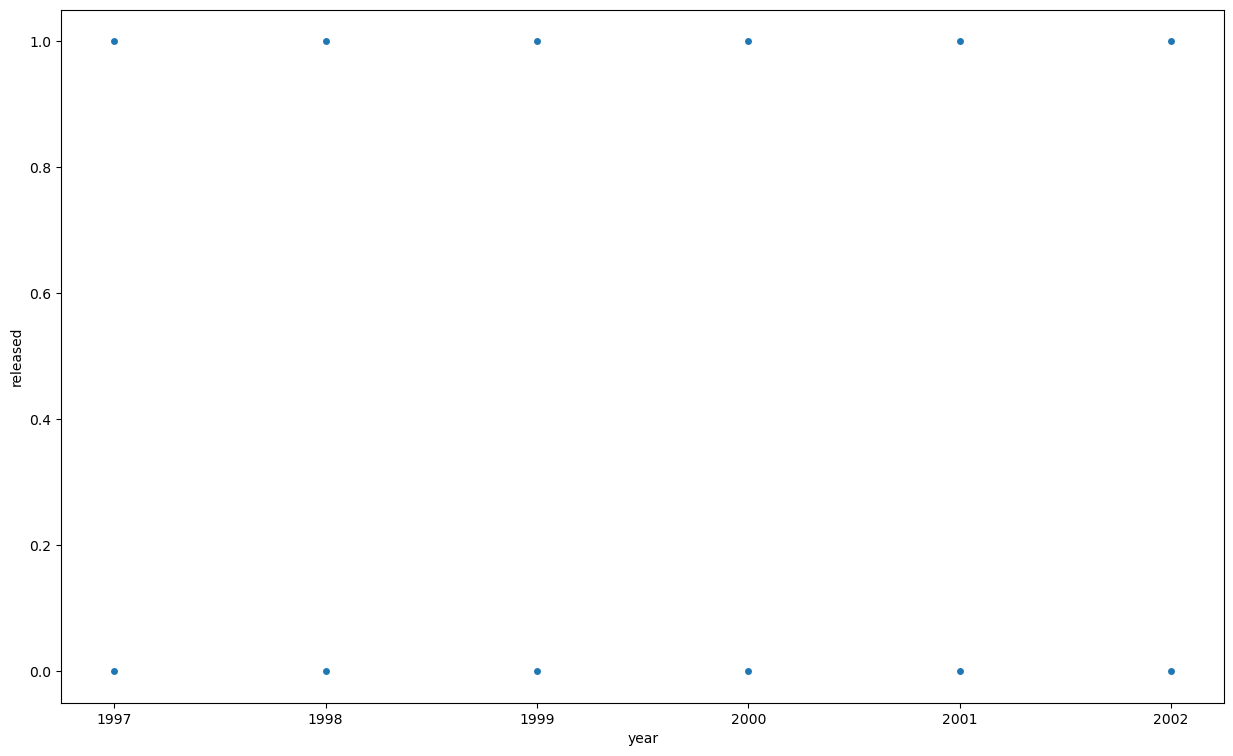

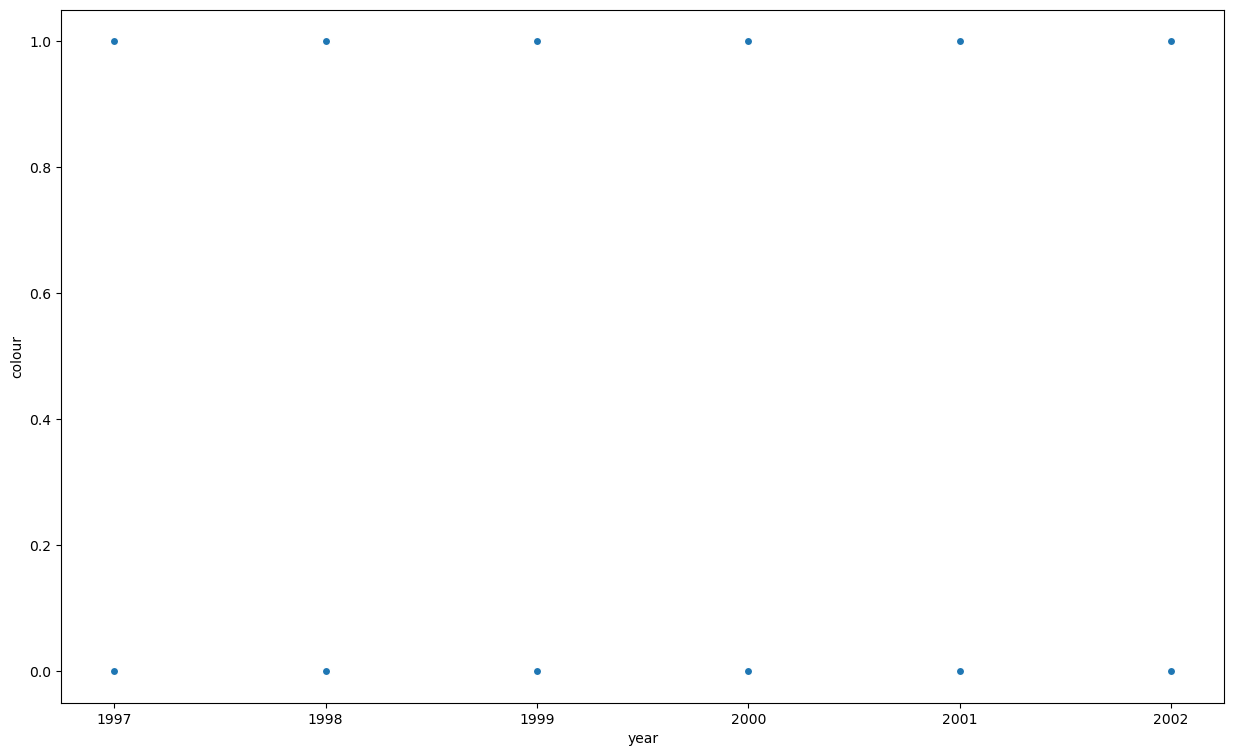

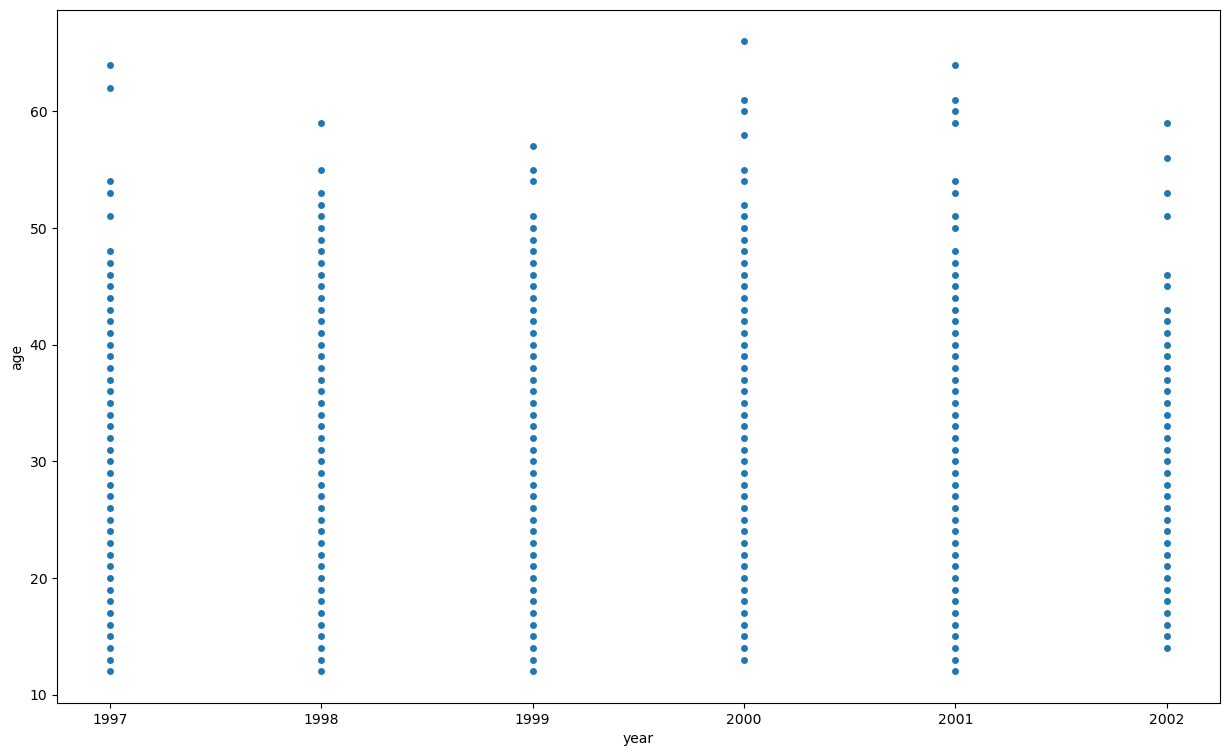

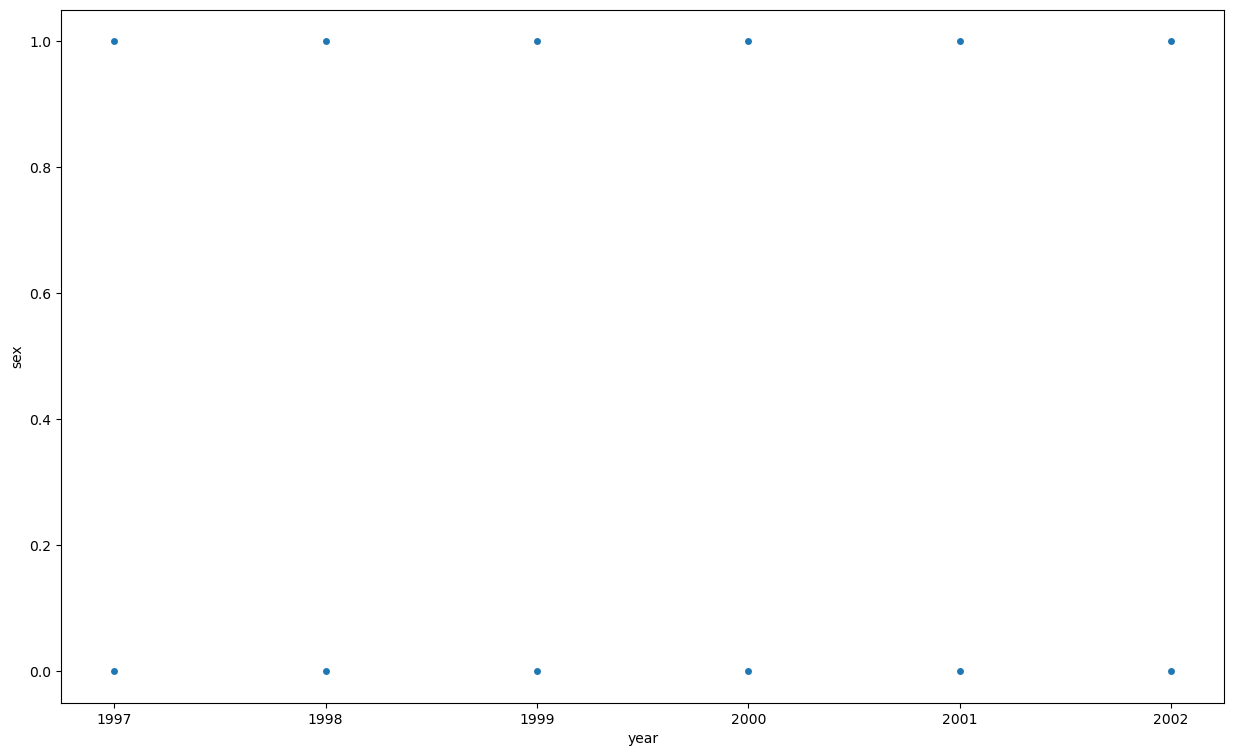

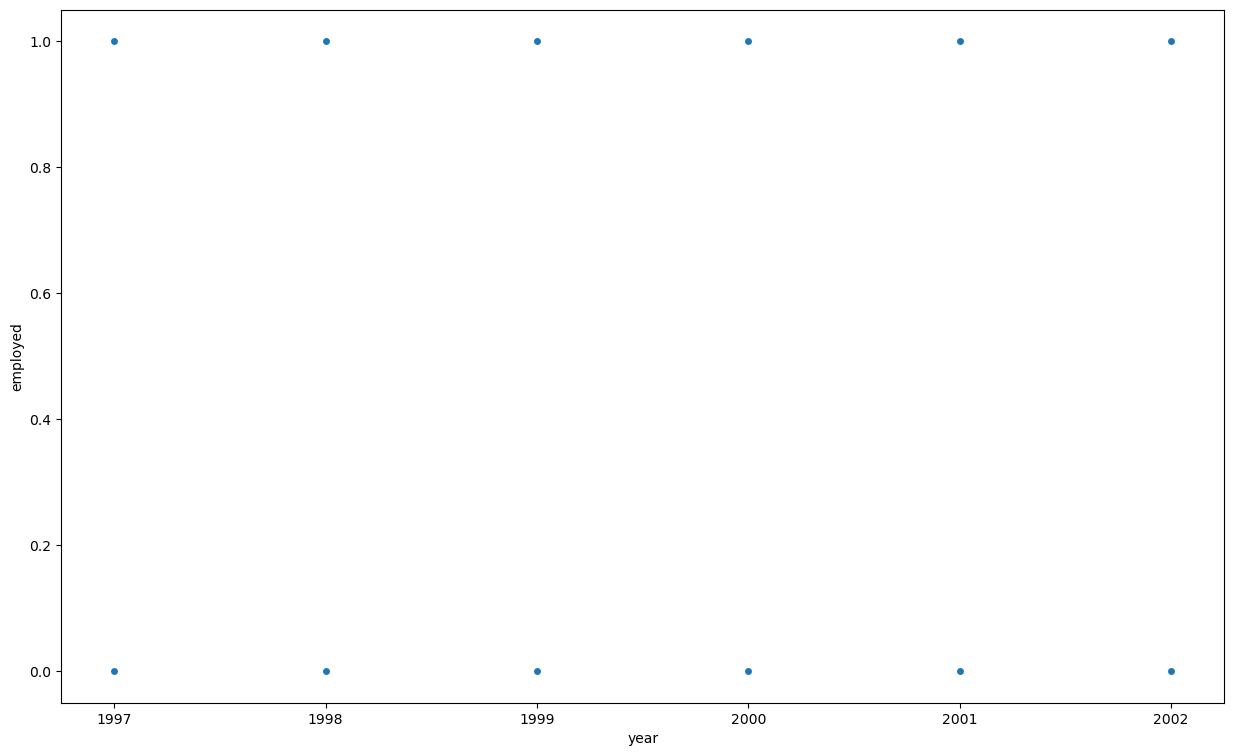

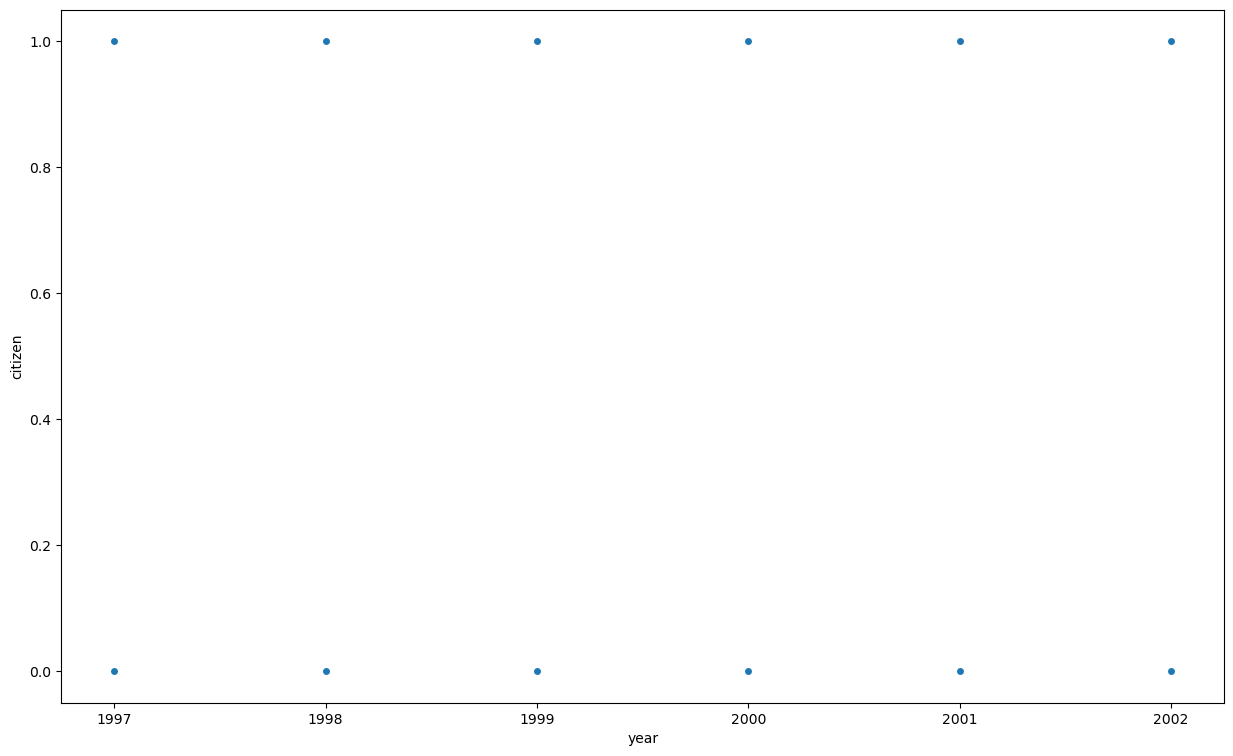

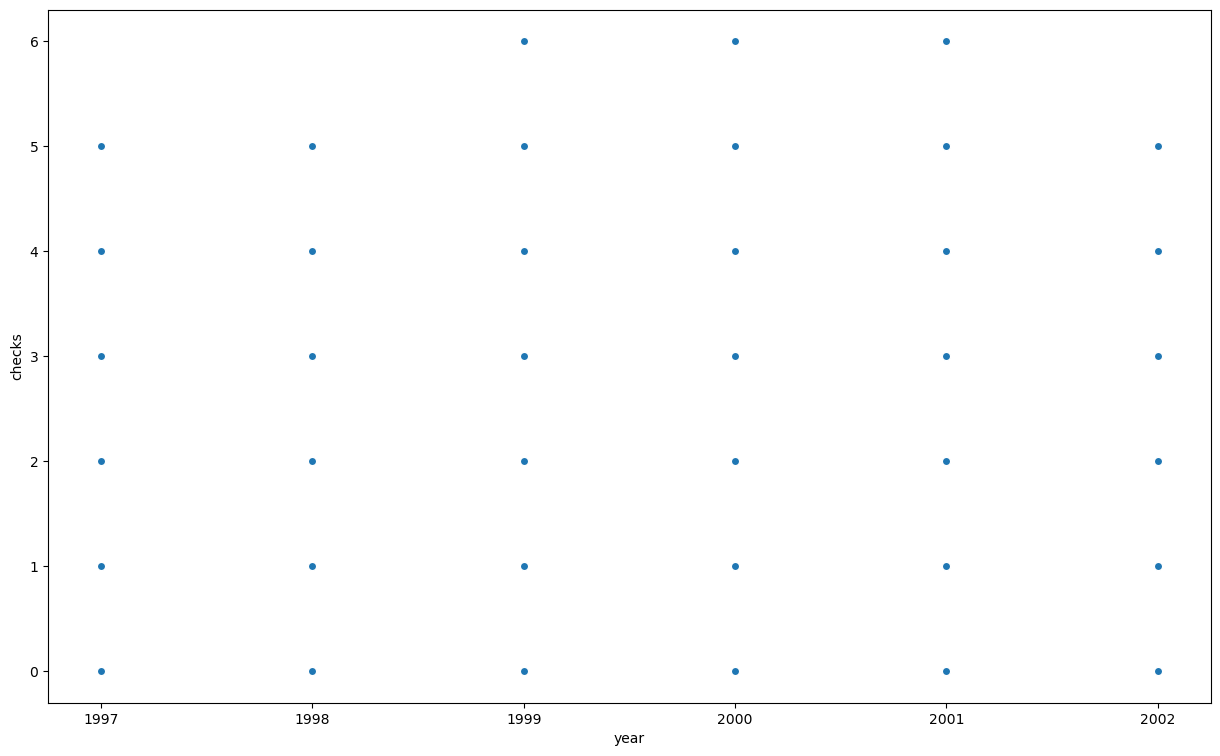

In [40]:
for i in ['released', 'colour','age', 'sex', 'employed', 'citizen',
       'checks']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.year,y=df[i],data=df,linewidth=1)
    plt.show()

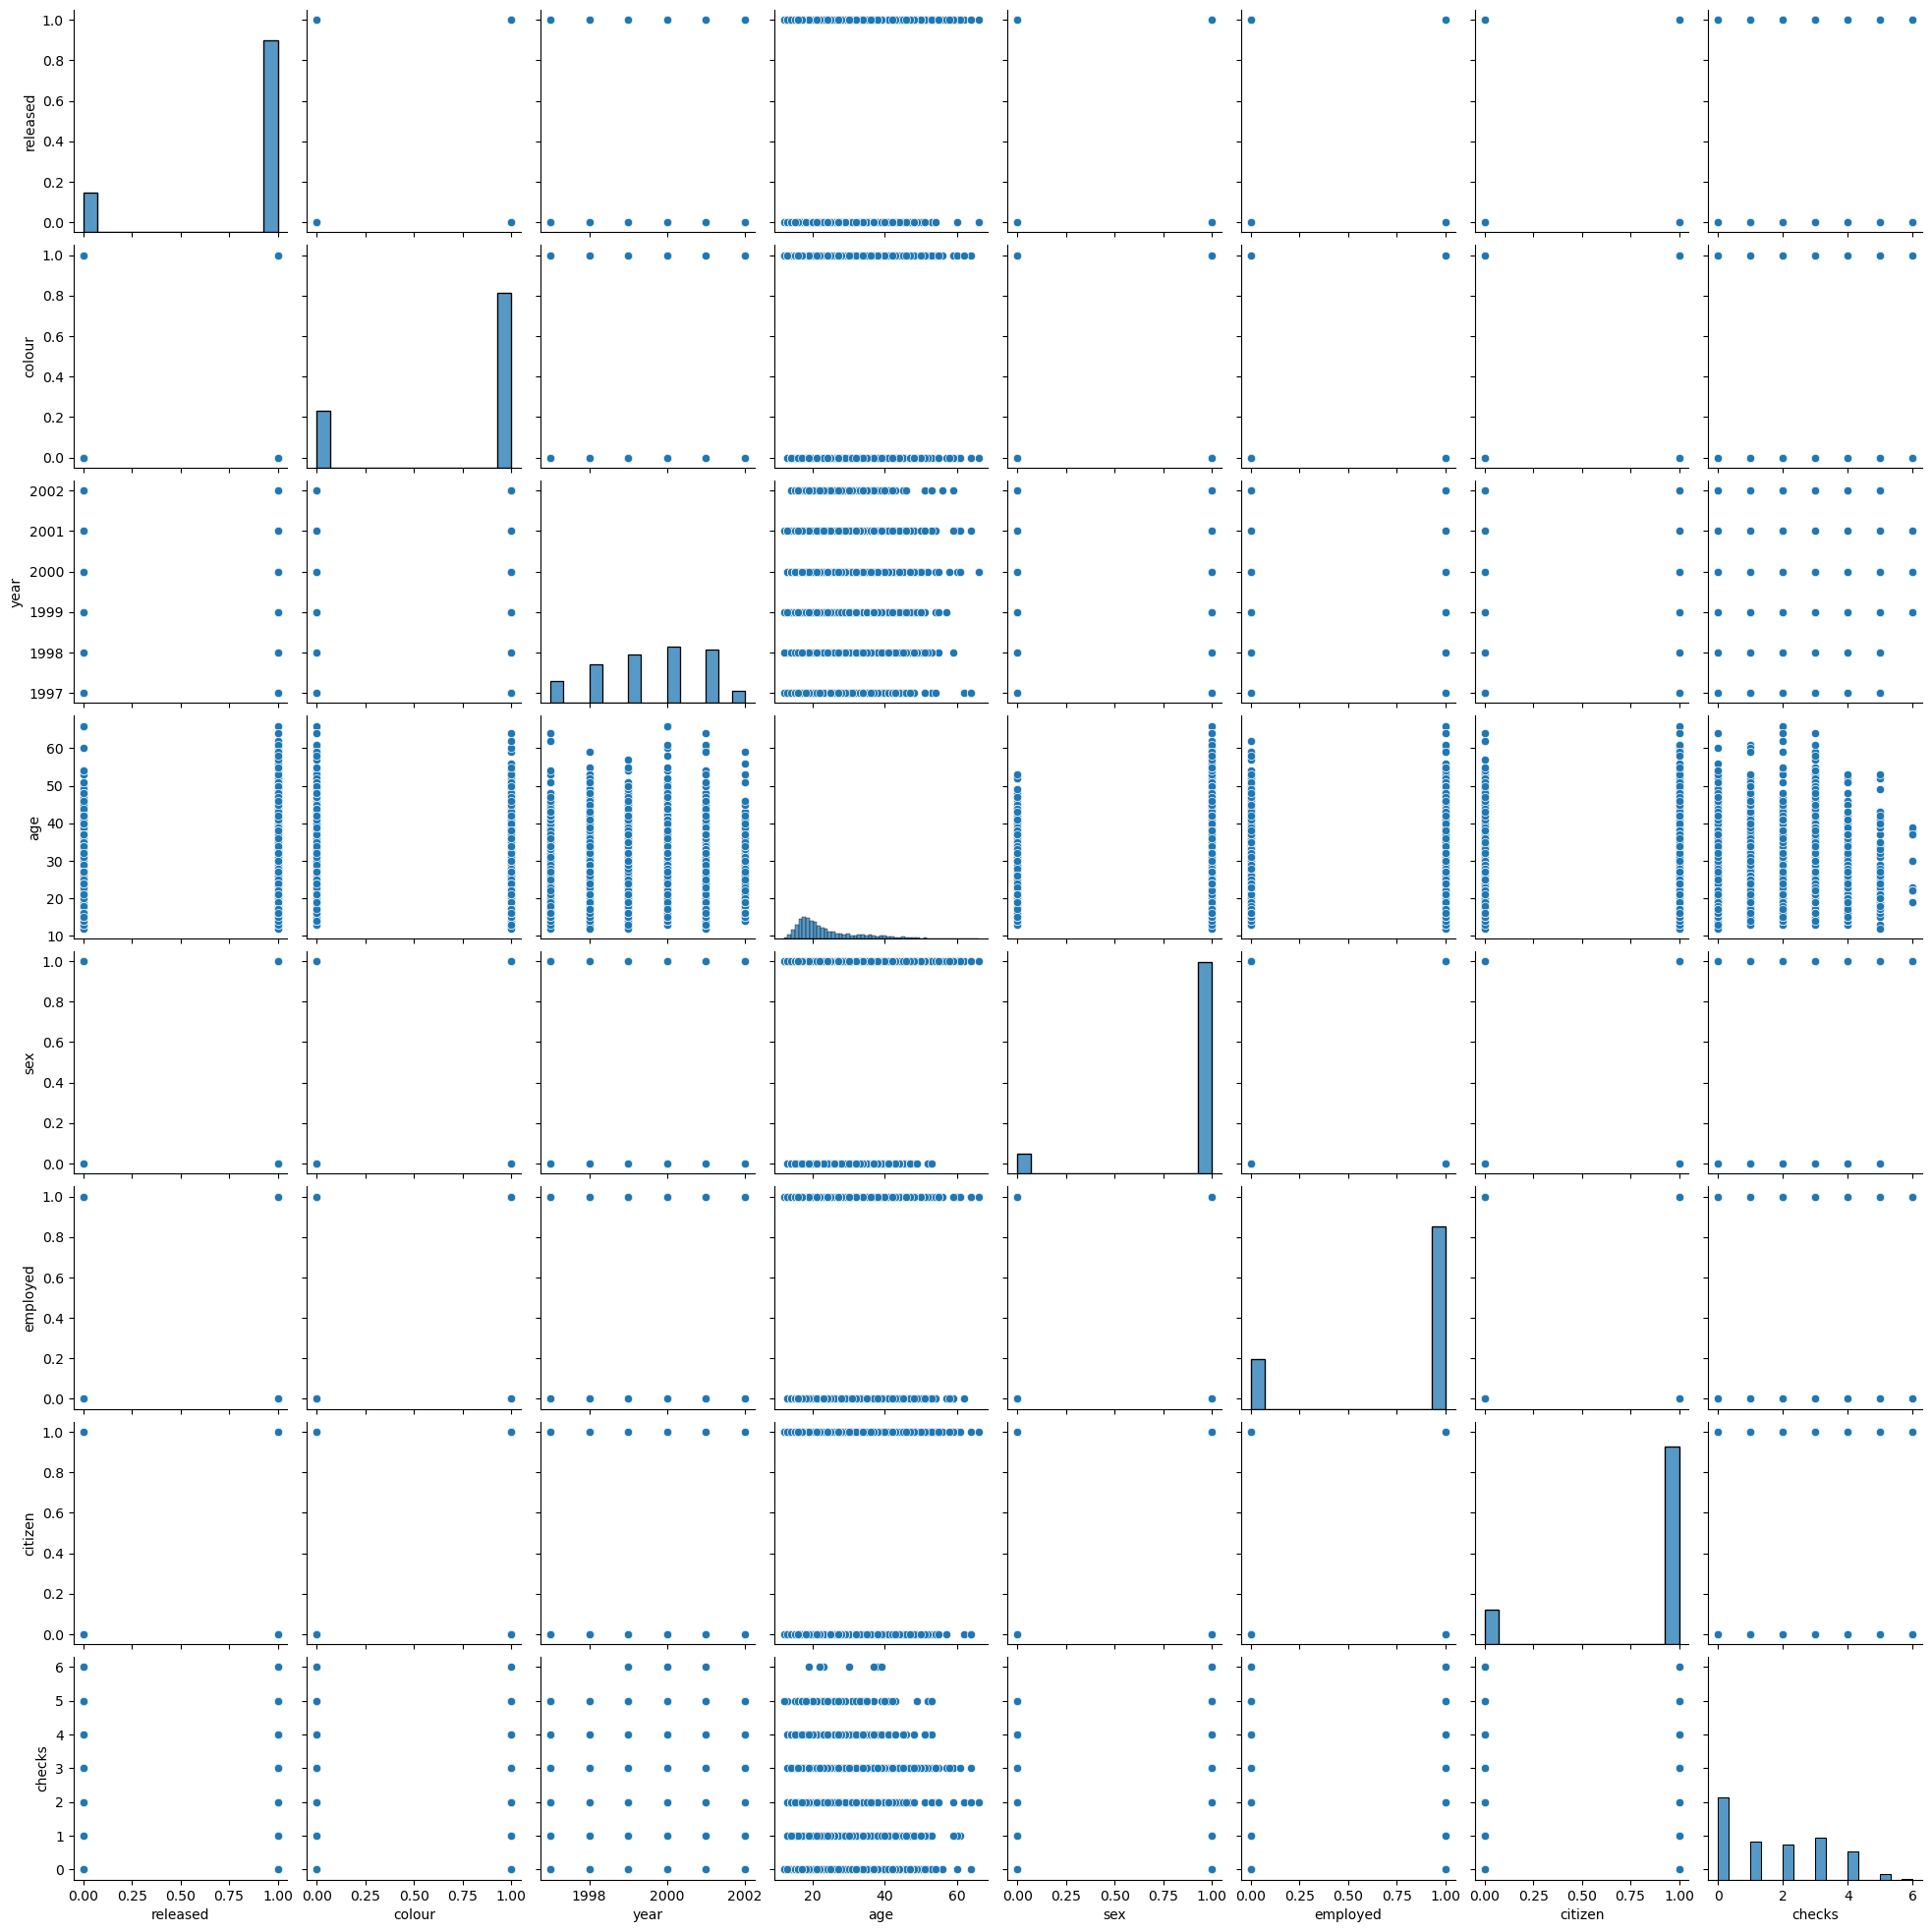

In [44]:
sns.pairplot(df)

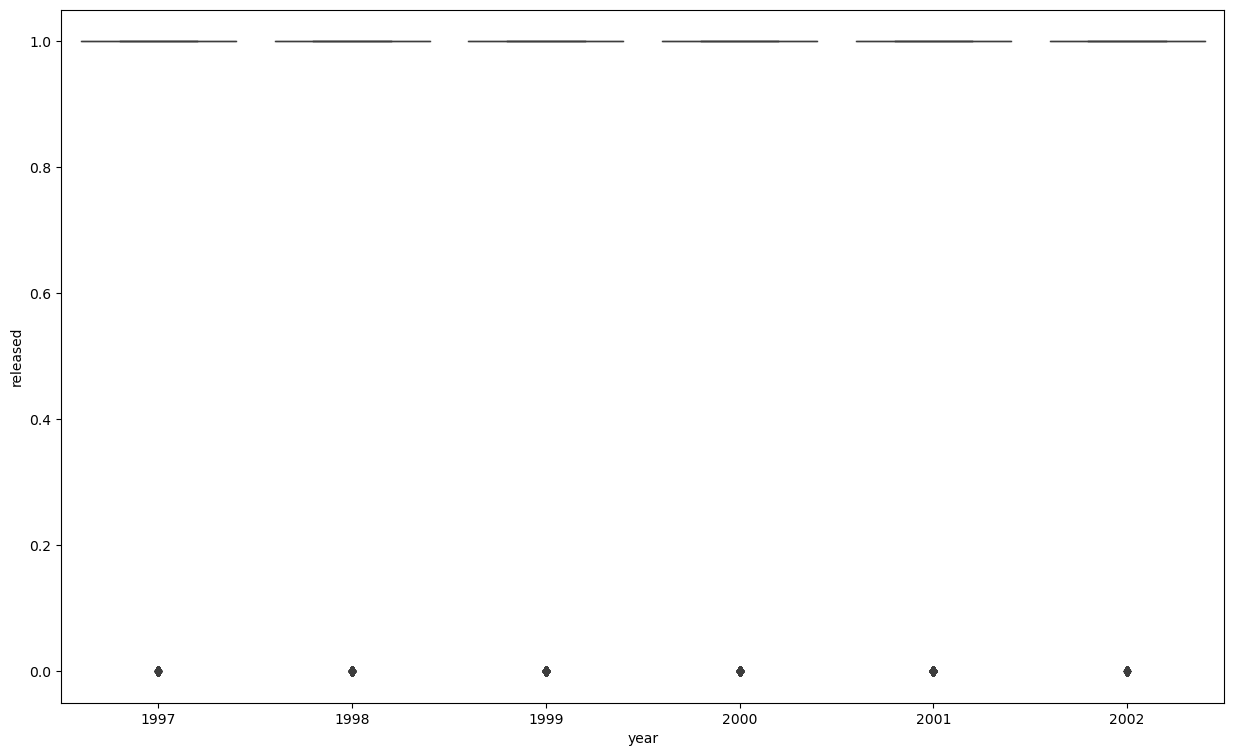

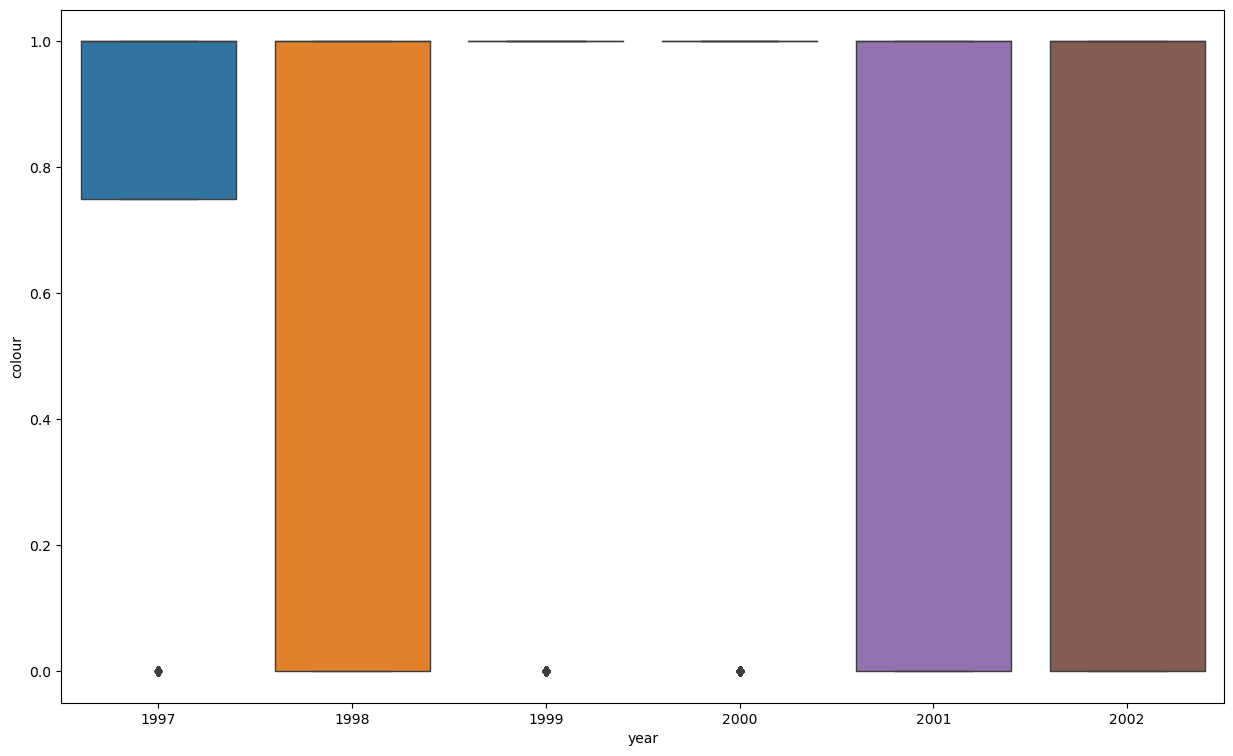

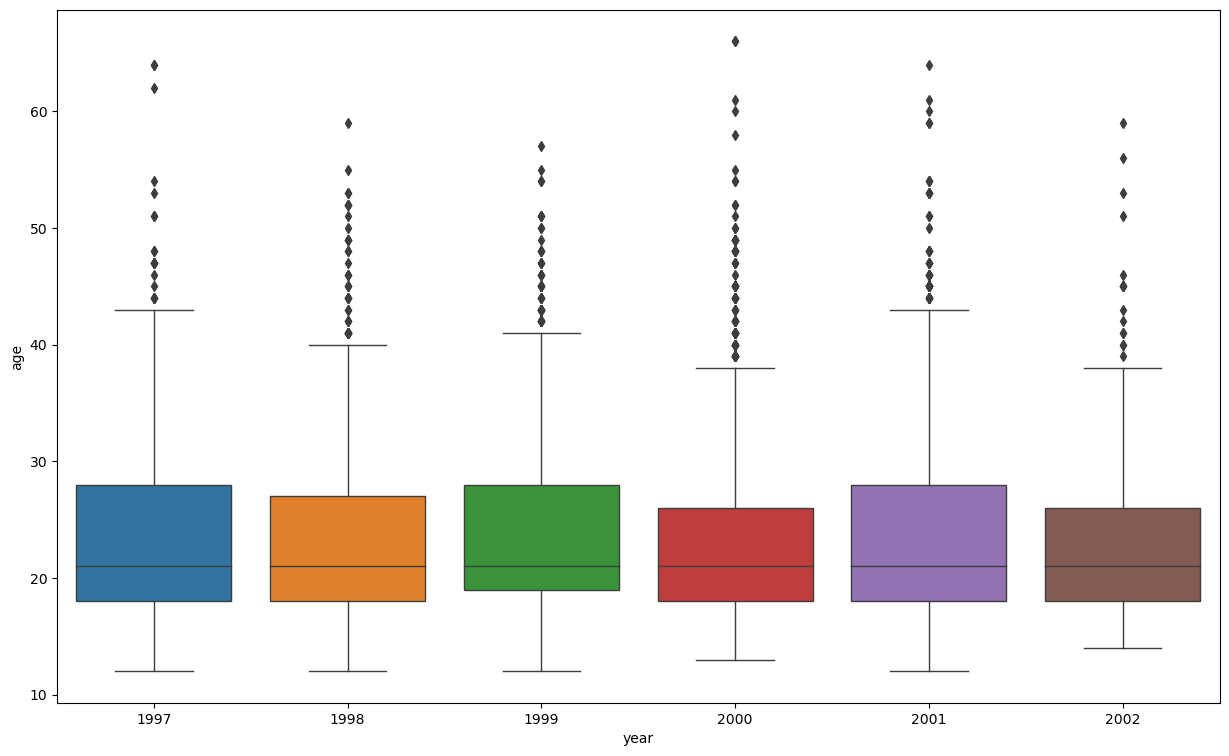

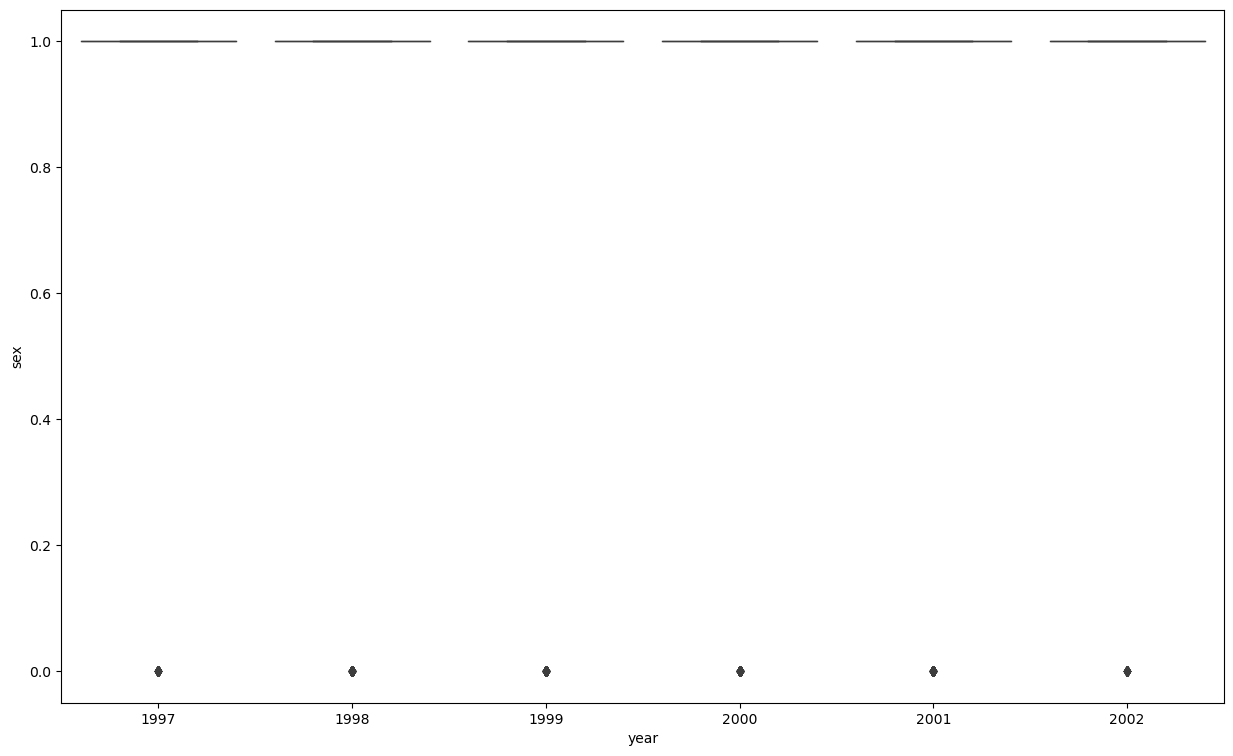

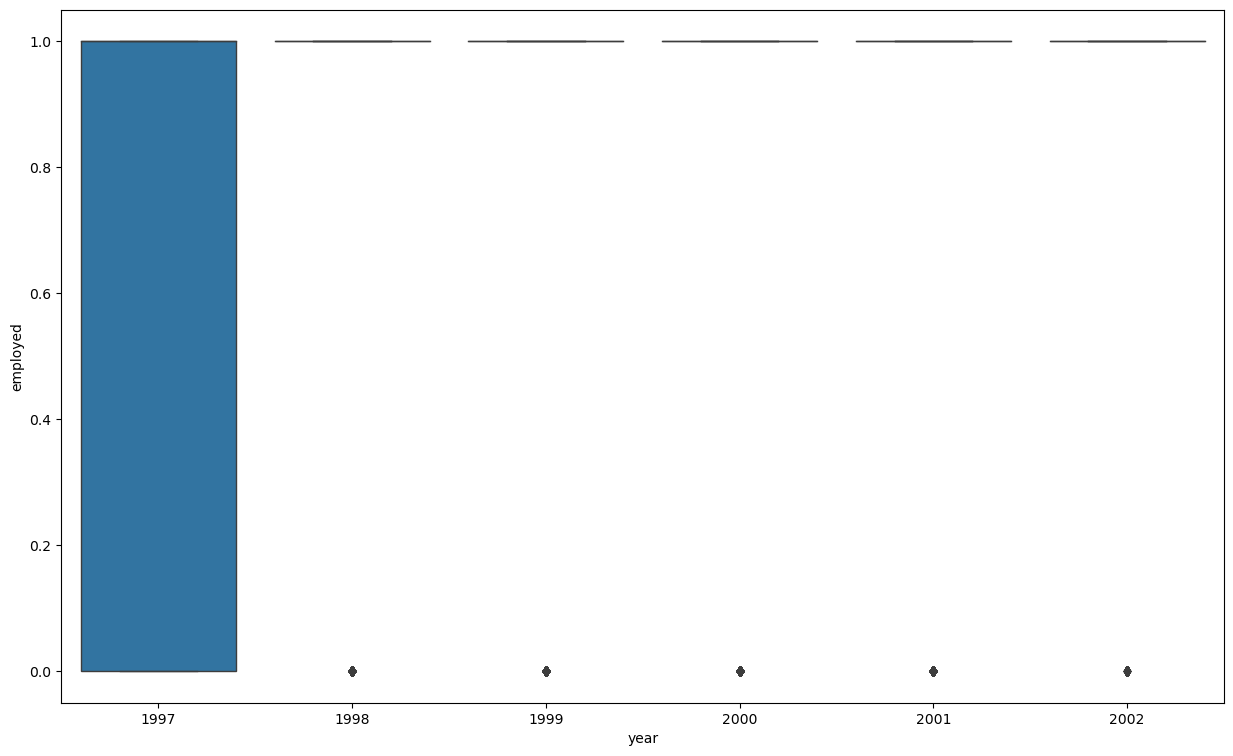

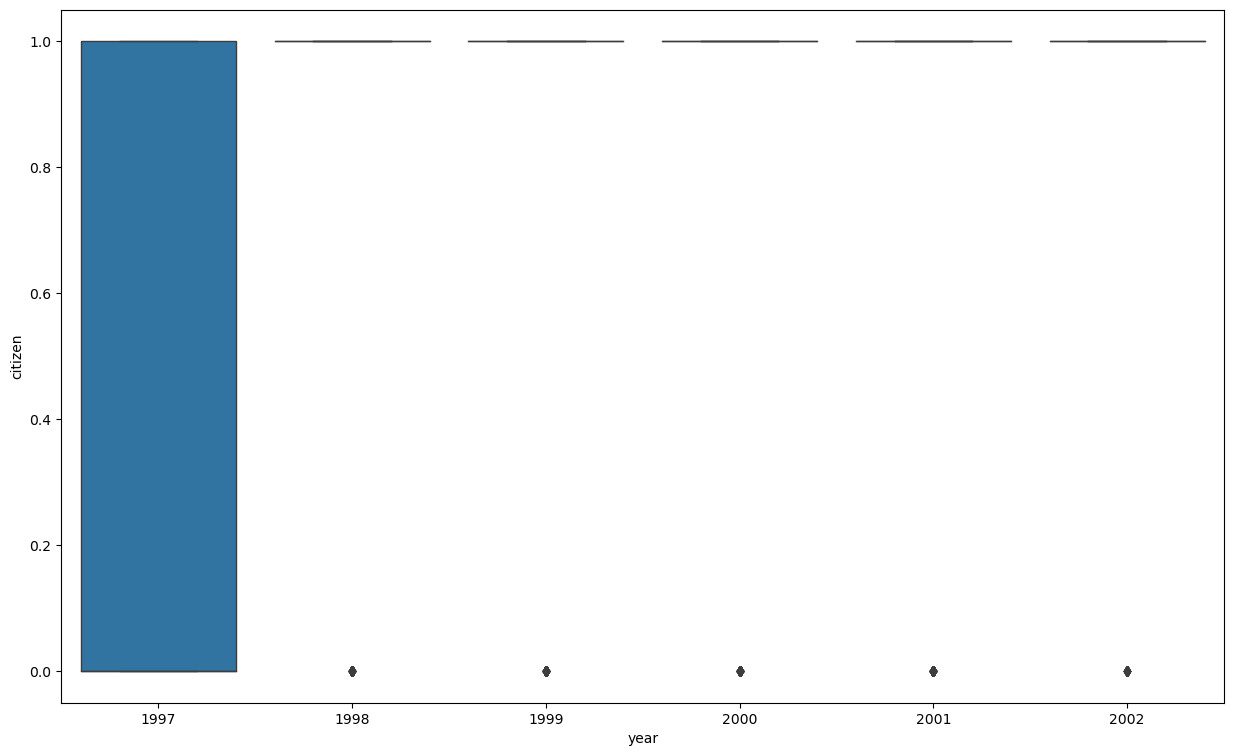

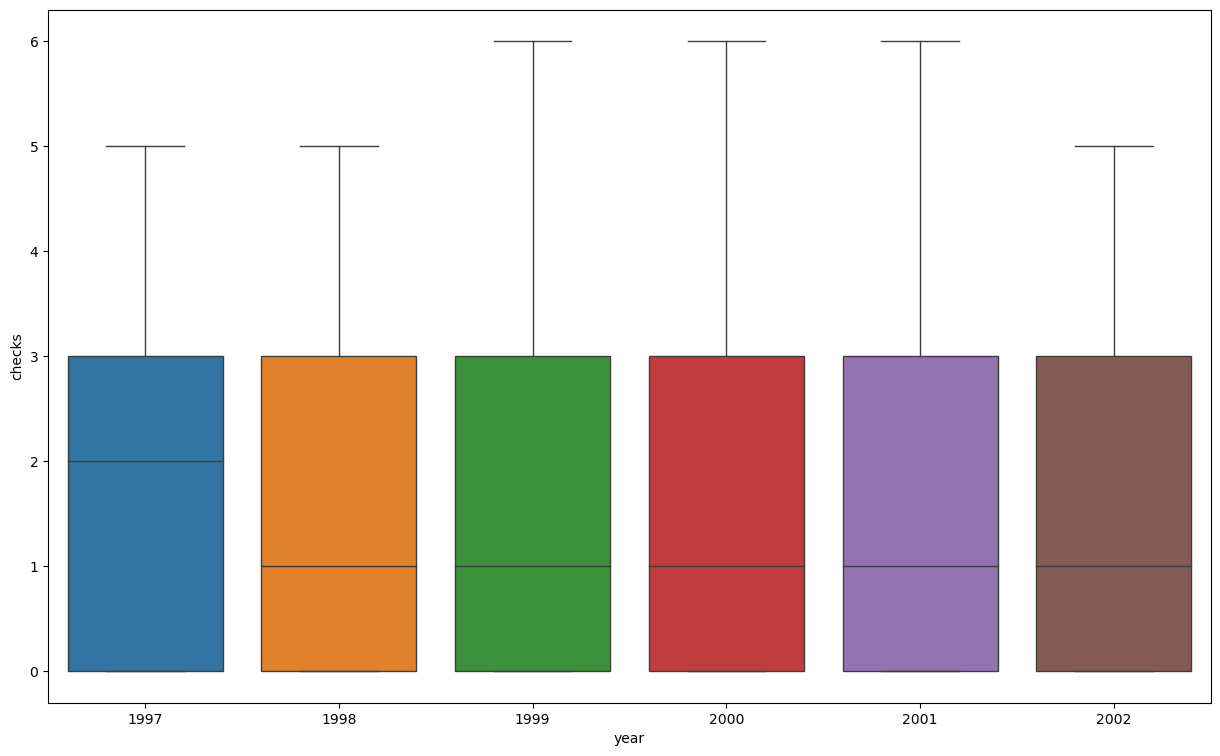

In [45]:
for i in ['released', 'colour','age', 'sex', 'employed', 'citizen',
       'checks']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.year,y=df[i],data=df,linewidth=1)
    plt.show()

<Axes: xlabel='age', ylabel='sex'>

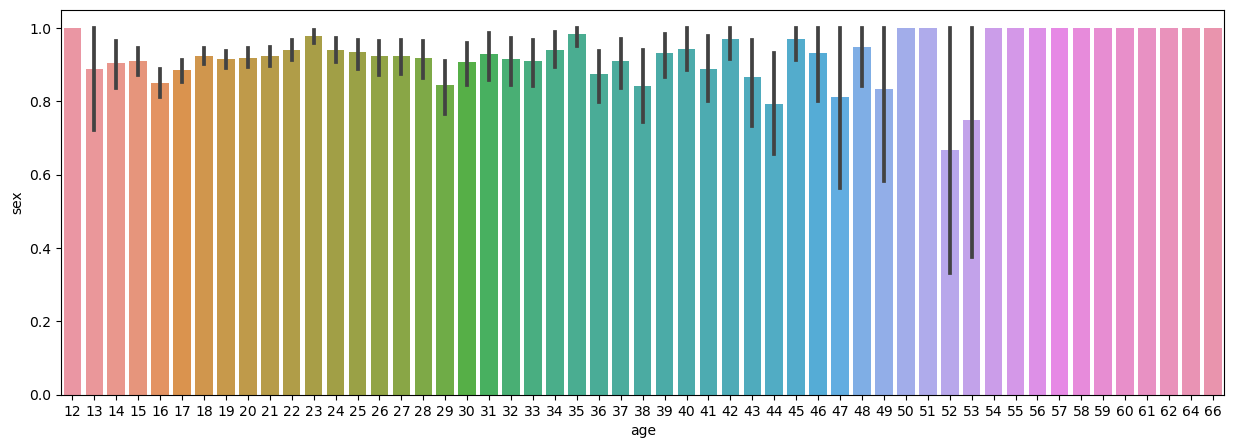

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x="age", y="sex")

<Axes: >

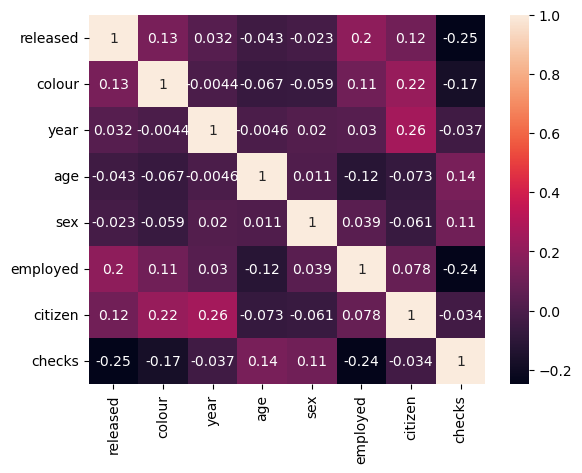

In [51]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

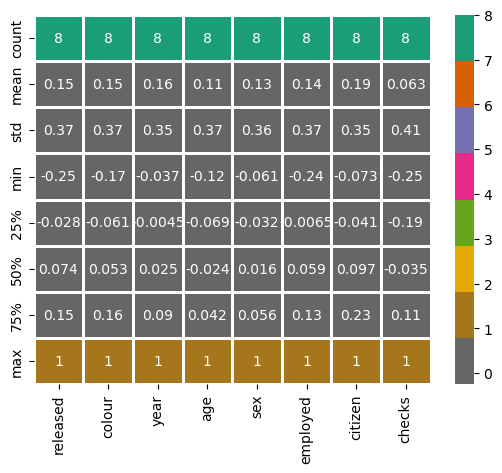

In [52]:
cmap=sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(df.corr().describe(),annot=True,cmap='Dark2_r',linewidths=2)

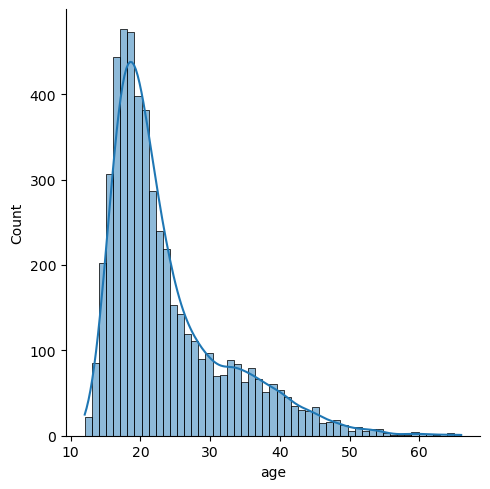

In [54]:
sns.displot(data=df, x="age", kde=True)

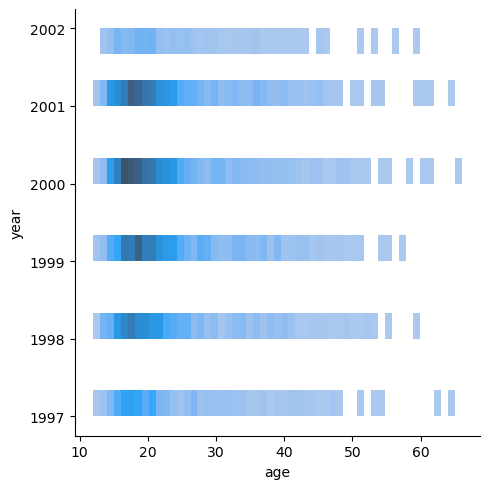

In [56]:
sns.displot(data=df, x="age", y="year")

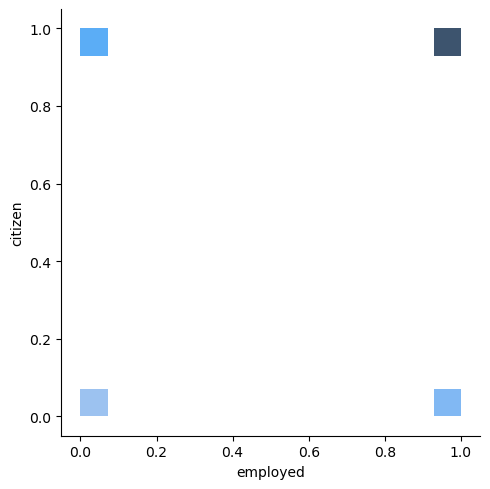

In [58]:
sns.displot(data=df, x="employed", y="citizen")

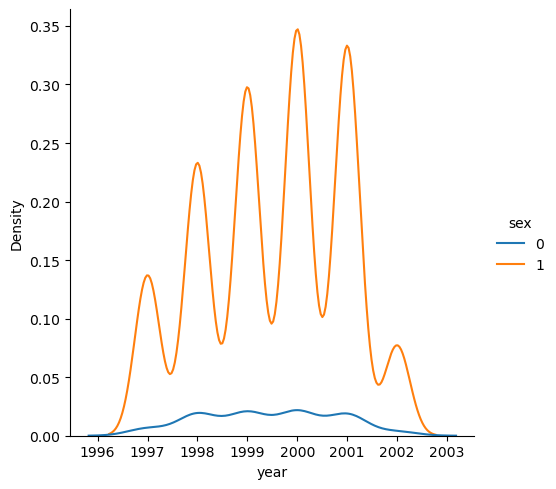

In [59]:
sns.displot(data=df, x="year", hue="sex", kind="kde")

C:\Users\21. Technology\AppData\Local\Temp\ipykernel_5836\3110133126.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="year", hue="age", col="sex", kind="kde")
C:\Users\21. Technology\AppData\Local\Temp\ipykernel_5836\3110133126.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="year", hue="age", col="sex", kind="kde")
C:\Users\21. Technology\AppData\Local\Temp\ipykernel_5836\3110133126.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="year", hue="age", col="sex", kind="kde")
C:\Users\21. Technology\AppData\Local\Temp\ipykernel_5836\3110133126.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="year", hu

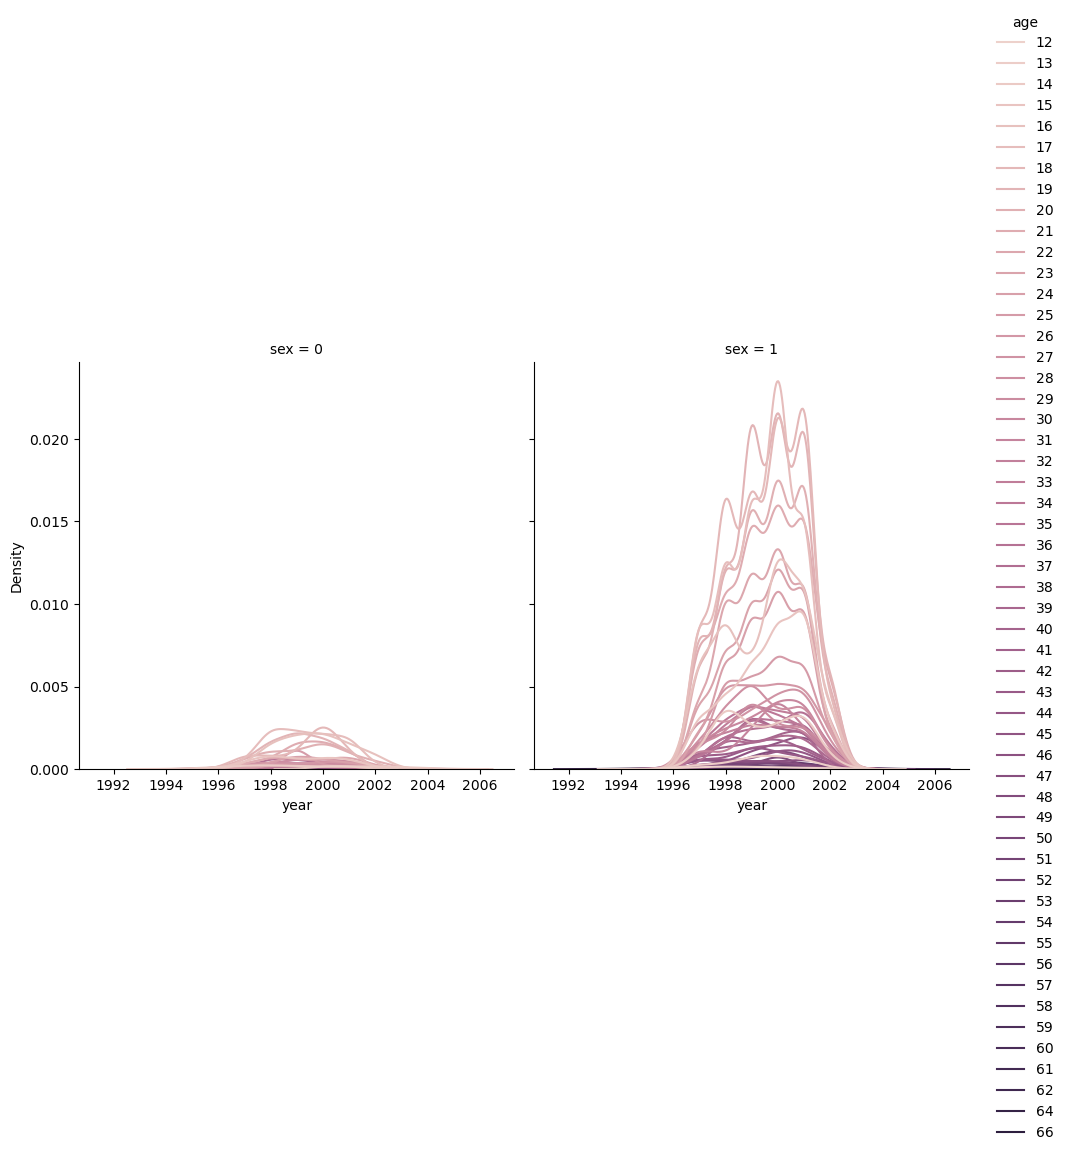

In [60]:
sns.displot(data=df, x="year", hue="age", col="sex", kind="kde")

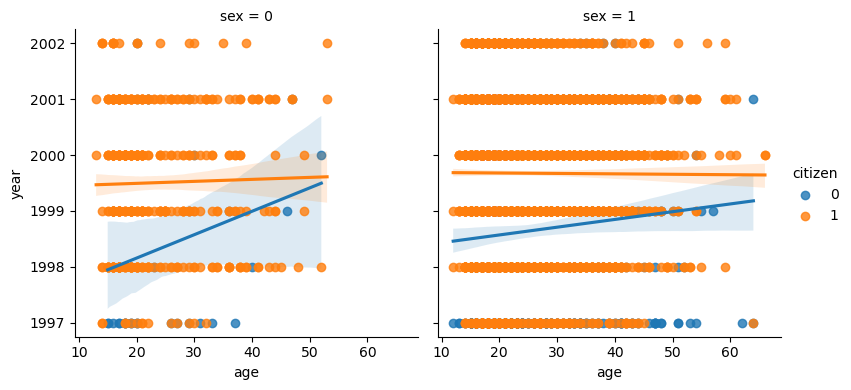

In [65]:
sns.lmplot(
    data=df, x="age", y="year",
    hue="citizen", col="sex", height=4,
)

In [66]:
df.columns

Index(['released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen',
       'checks'],
      dtype='object')

<Axes: xlabel='released', ylabel='age'>

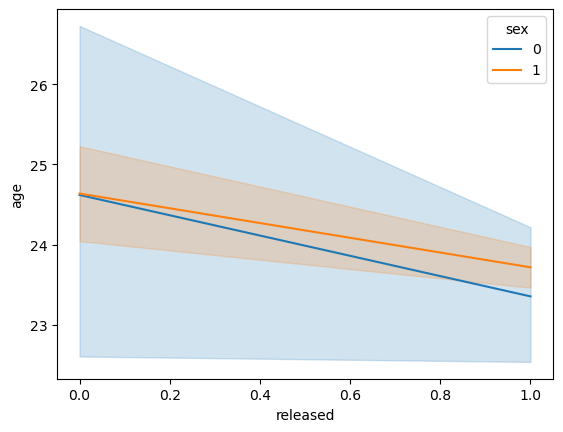

In [68]:
sns.lineplot(data=df, x="released", y="age", hue="sex")

<Axes: xlabel='employed', ylabel='year'>

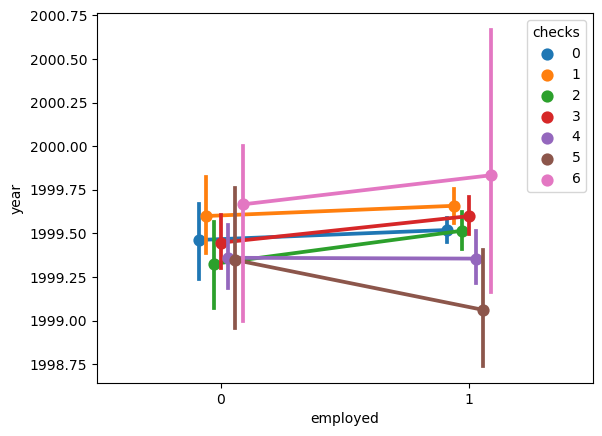

In [69]:
sns.pointplot(data=df, x="employed", y="year", hue="checks", dodge=True)

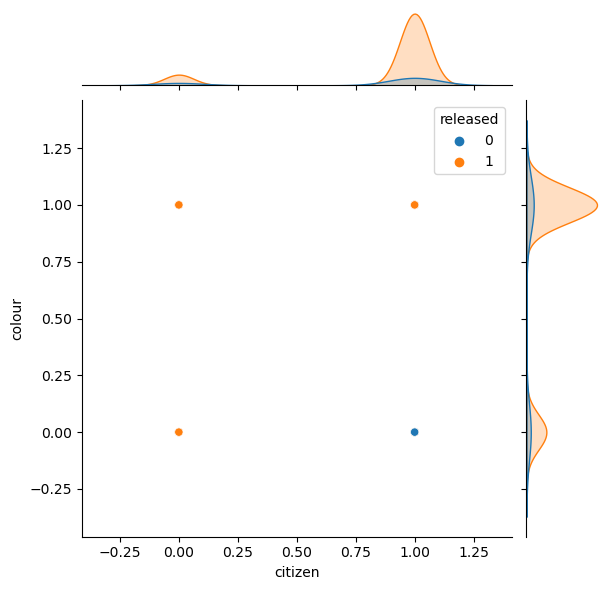

In [71]:
sns.jointplot(data=df, x="citizen", y="colour", hue="released")

<Axes: xlabel='age', ylabel='sex'>

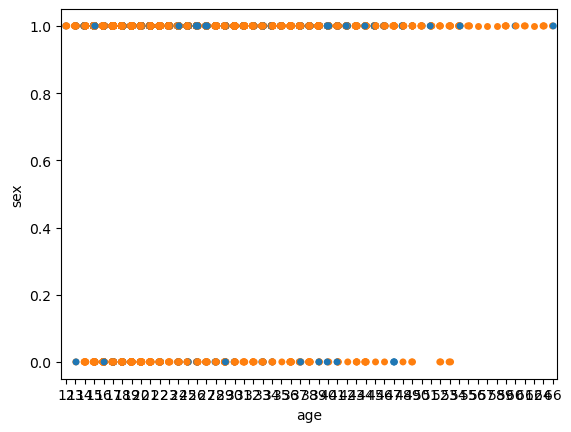

In [74]:
sns.stripplot(data=df, x="age", y="sex", hue="released", legend=False)

<Axes: xlabel='released', ylabel='year'>

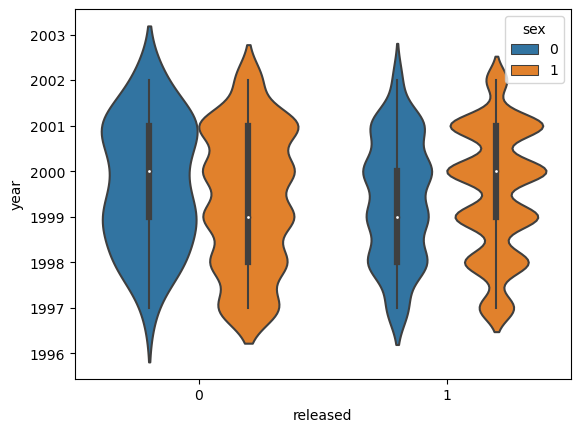

In [75]:
sns.violinplot(data=df, x="released", y="year", hue="sex")

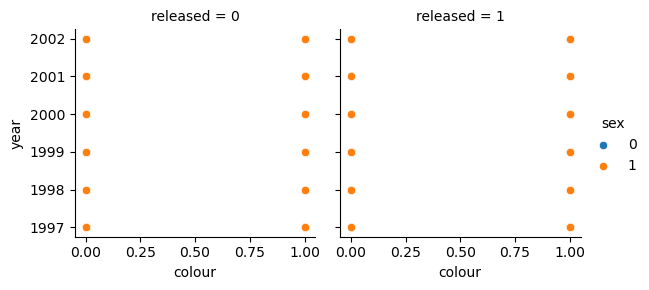

In [77]:
g = sns.FacetGrid(df, col="released", hue="sex")
g.map_dataframe(sns.scatterplot, x="colour", y="year")
g.add_legend()

In [85]:
df.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,1,1,1,3
1,0,0,1999,17,1,1,1,3
2,1,1,2000,24,1,1,1,3
3,0,0,2000,46,1,1,1,1
4,1,0,1999,27,0,1,1,1
